<a href="https://colab.research.google.com/github/snehasingh0125/USER_PROFILING_AND_SEGMENTATION/blob/main/USER_PROFILING_AND_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project has been completed by Sneha Singh, a B.Tech student in Electronics and Communication Engineering (ECE) with a specialization in Artificial Intelligence and Machine Learning (AIML). It was done as part of my AIML internship project focused on data-driven marketing and user analytics.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("user_profiles_for_ads.csv")
print(data.head())

   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
1                              0.5                              7.7   
2                              4.5             

In [3]:
print(data.isnull().sum())

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64


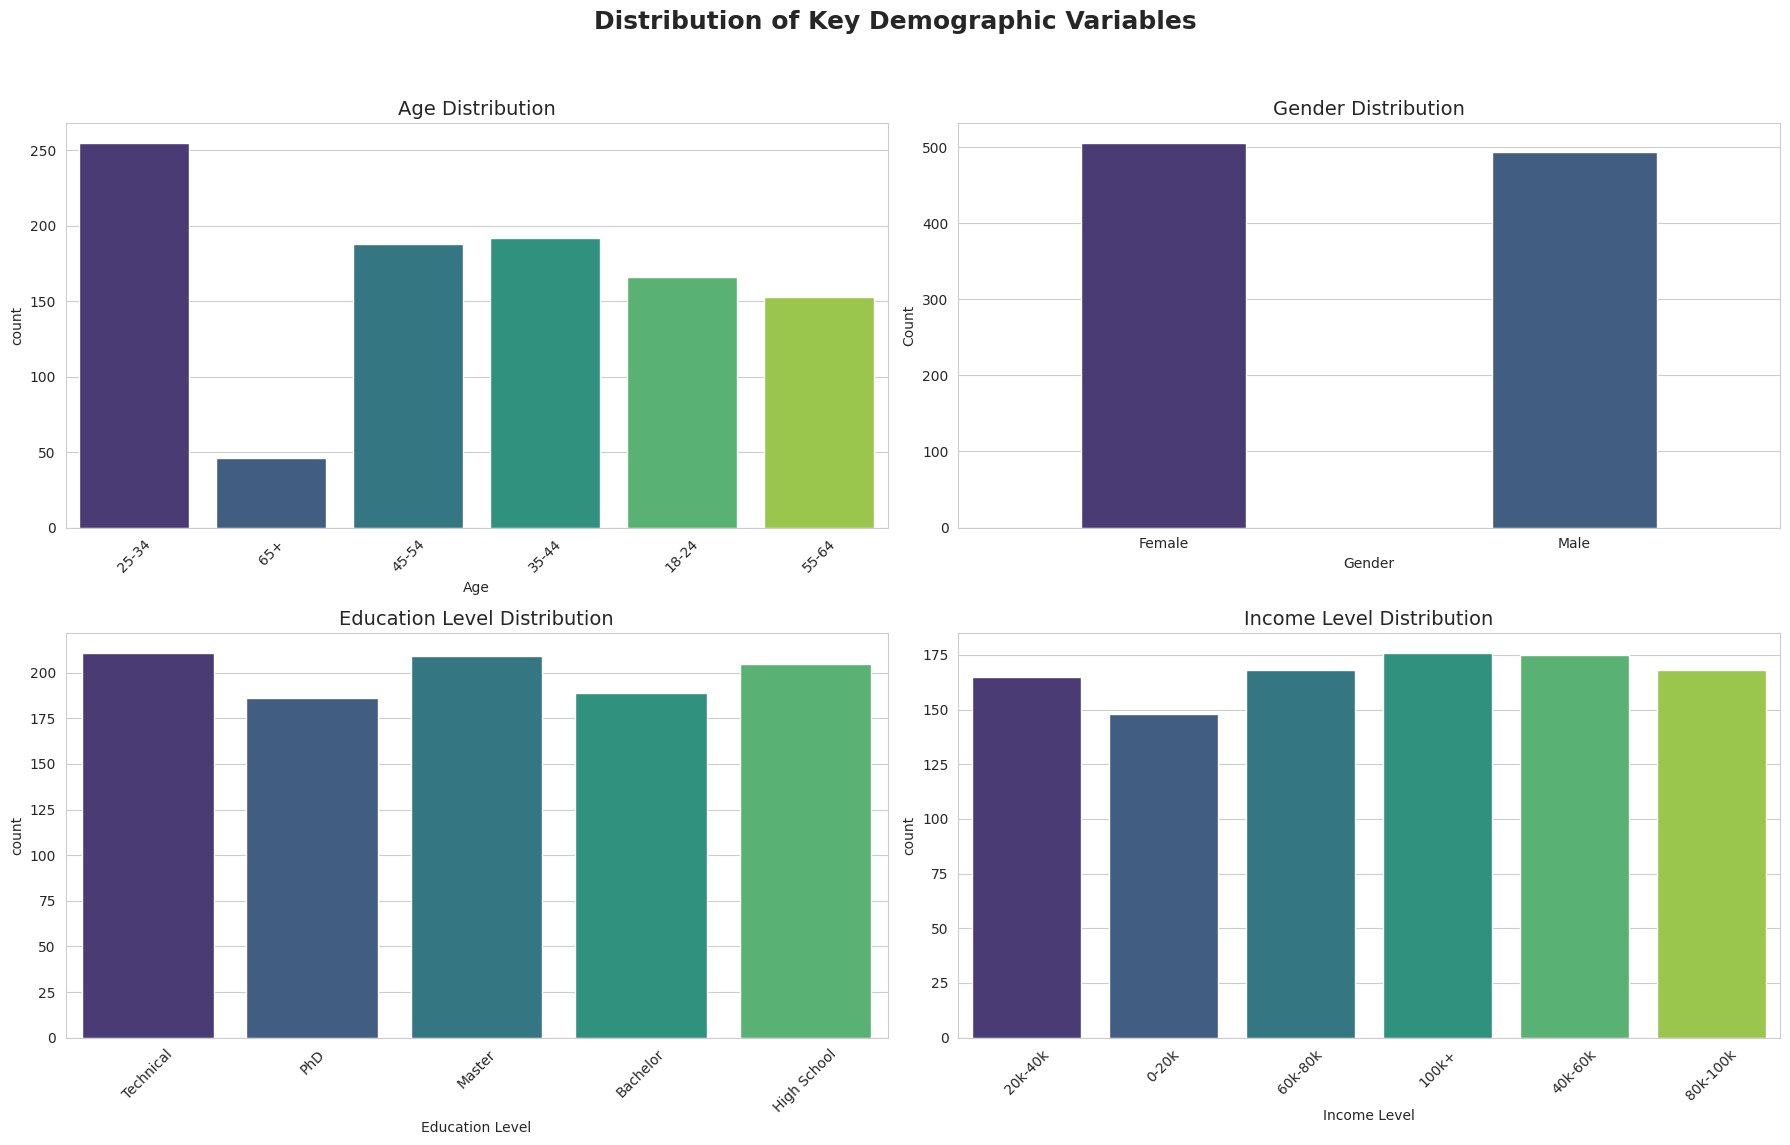

In [5]:
# Set the style
sns.set_style("whitegrid")
custom_palette = sns.color_palette("viridis")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Key Demographic Variables', fontsize=18, fontweight='bold')

# Age distribution
sns.countplot(ax=axes[0, 0], x='Age', data=data, palette=custom_palette)
axes[0, 0].set_title('Age Distribution', fontsize=14)
axes[0, 0].tick_params(axis='x', rotation=45)

# Gender distribution (fixed width using barplot instead of countplot)
gender_counts = data['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
sns.barplot(ax=axes[0, 1], x='Gender', y='Count', data=gender_counts, palette=custom_palette, width=0.4)
axes[0, 1].set_title('Gender Distribution', fontsize=14)

# Education level distribution
sns.countplot(ax=axes[1, 0], x='Education Level', data=data, palette=custom_palette)
axes[1, 0].set_title('Education Level Distribution', fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=45)

# Income level distribution
sns.countplot(ax=axes[1, 1], x='Income Level', data=data, palette=custom_palette)
axes[1, 1].set_title('Income Level Distribution', fontsize=14)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



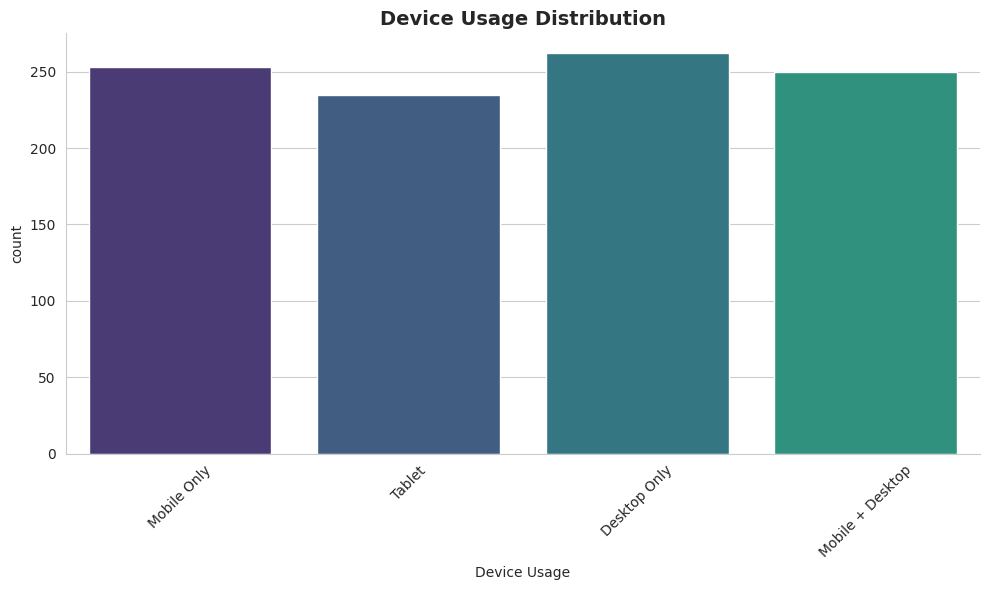

In [7]:
# device usage distribution
custom_palette = sns.color_palette("viridis")

# Device Usage Distribution (as standalone plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='Device Usage', data=data, palette=custom_palette)
plt.title('Device Usage Distribution', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()


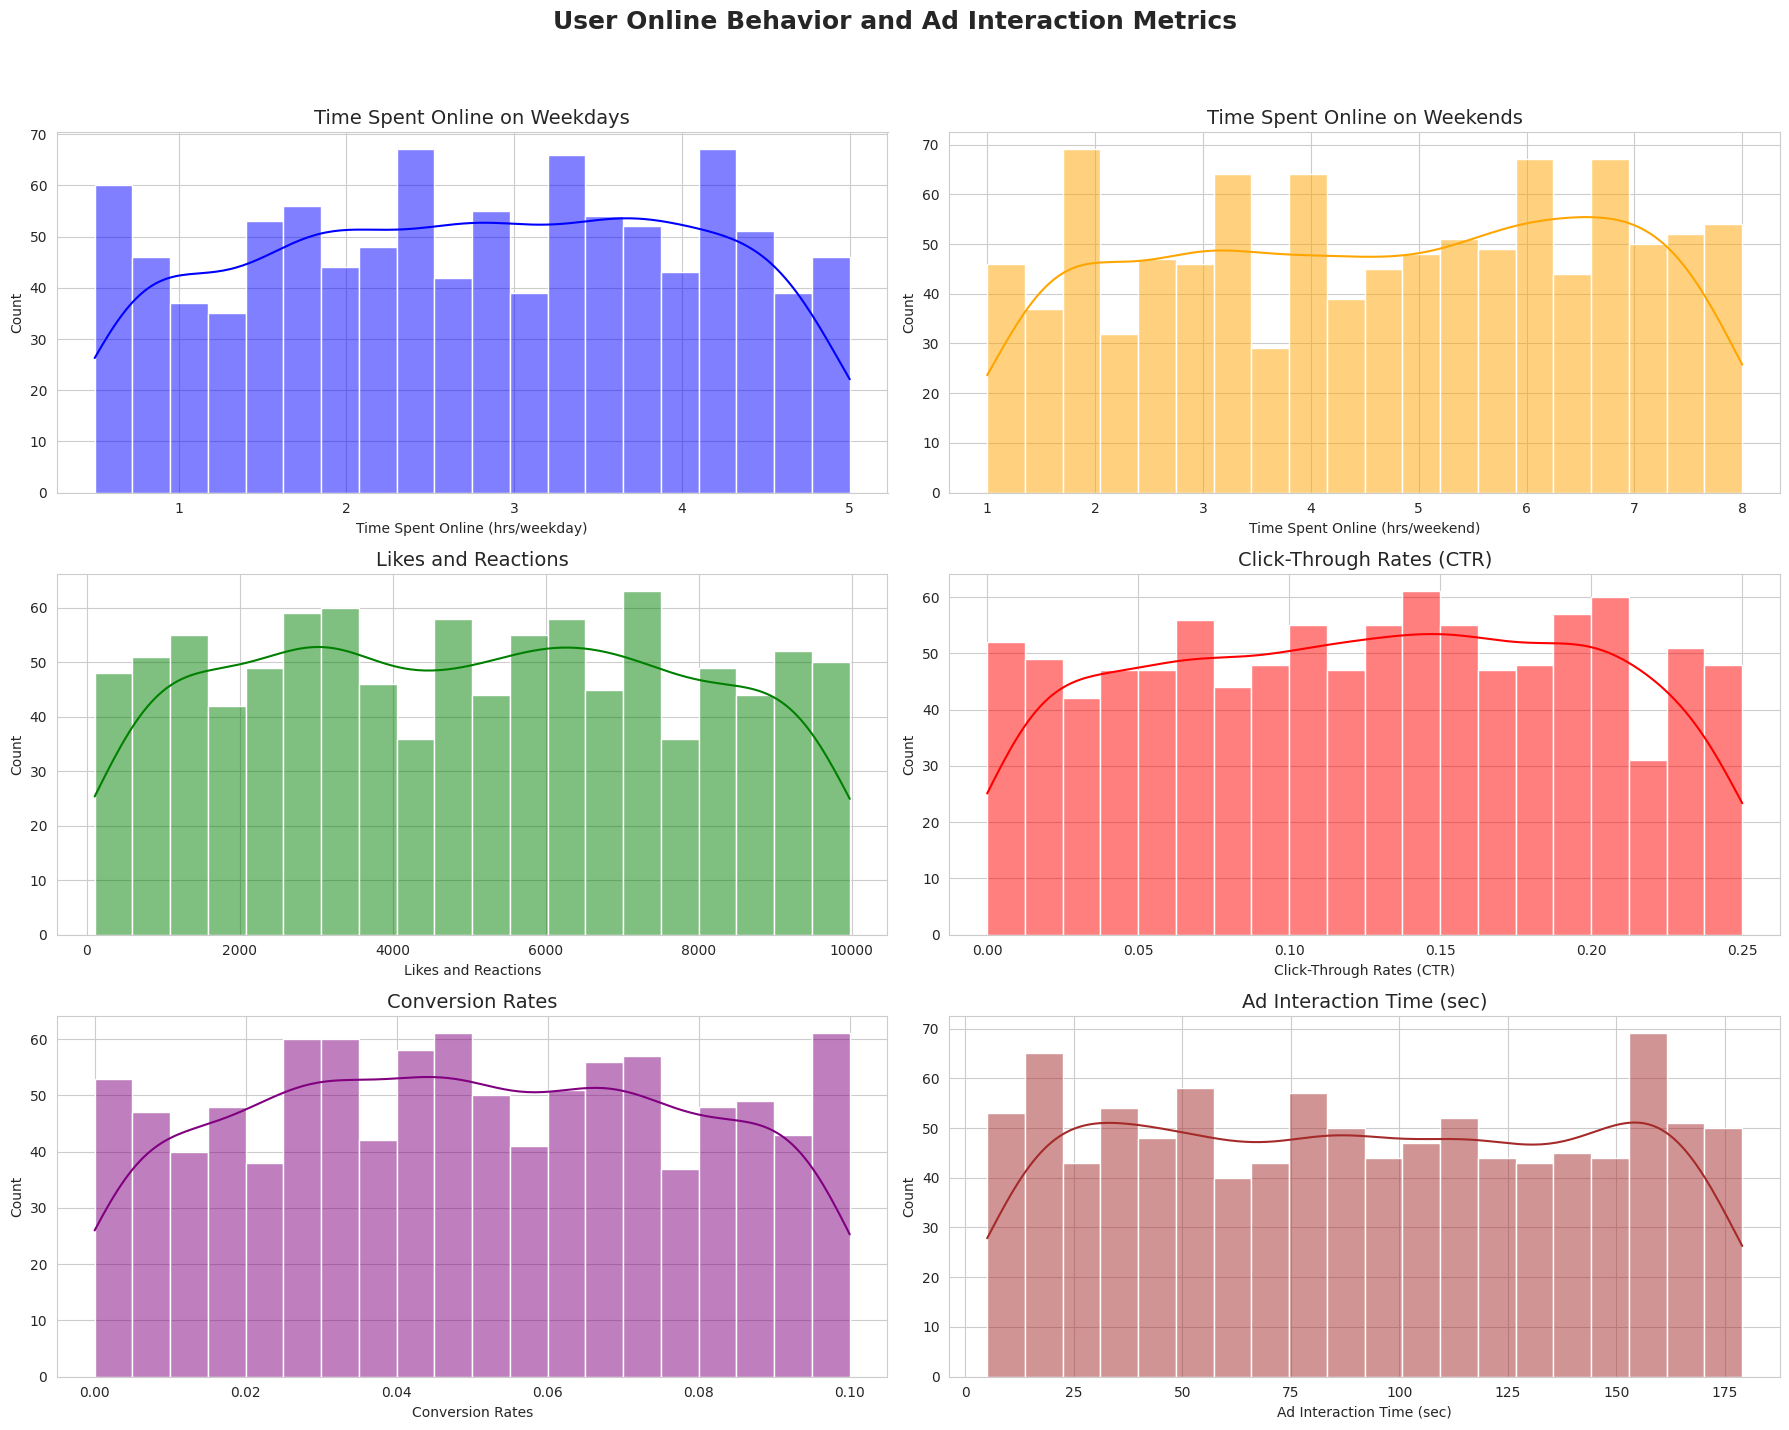

In [11]:
# Set Seaborn style
sns.set_style("whitegrid")
custom_palette = sns.color_palette("viridis")

# Create subplots for user online behavior and ad interaction metrics
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('User Online Behavior and Ad Interaction Metrics', fontsize=18, fontweight='bold')

# Time spent online on weekdays
sns.histplot(ax=axes[0, 0], x='Time Spent Online (hrs/weekday)', data=data, bins=20, kde=True, color='blue')
axes[0, 0].set_title('Time Spent Online on Weekdays', fontsize=14)

# Time spent online on weekends
sns.histplot(ax=axes[0, 1], x='Time Spent Online (hrs/weekend)', data=data, bins=20, kde=True, color='orange')
axes[0, 1].set_title('Time Spent Online on Weekends', fontsize=14)

# Likes and reactions
sns.histplot(ax=axes[1, 0], x='Likes and Reactions', data=data, bins=20, kde=True, color='green')
axes[1, 0].set_title('Likes and Reactions', fontsize=14)

# Click-through rates
sns.histplot(ax=axes[1, 1], x='Click-Through Rates (CTR)', data=data, bins=20, kde=True, color='red')
axes[1, 1].set_title('Click-Through Rates (CTR)', fontsize=14)

# Conversion rates
sns.histplot(ax=axes[2, 0], x='Conversion Rates', data=data, bins=20, kde=True, color='purple')
axes[2, 0].set_title('Conversion Rates', fontsize=14)

# Ad interaction time
sns.histplot(ax=axes[2, 1], x='Ad Interaction Time (sec)', data=data, bins=20, kde=True, color='brown')
axes[2, 1].set_title('Ad Interaction Time (sec)', fontsize=14)

# Layout adjustment
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



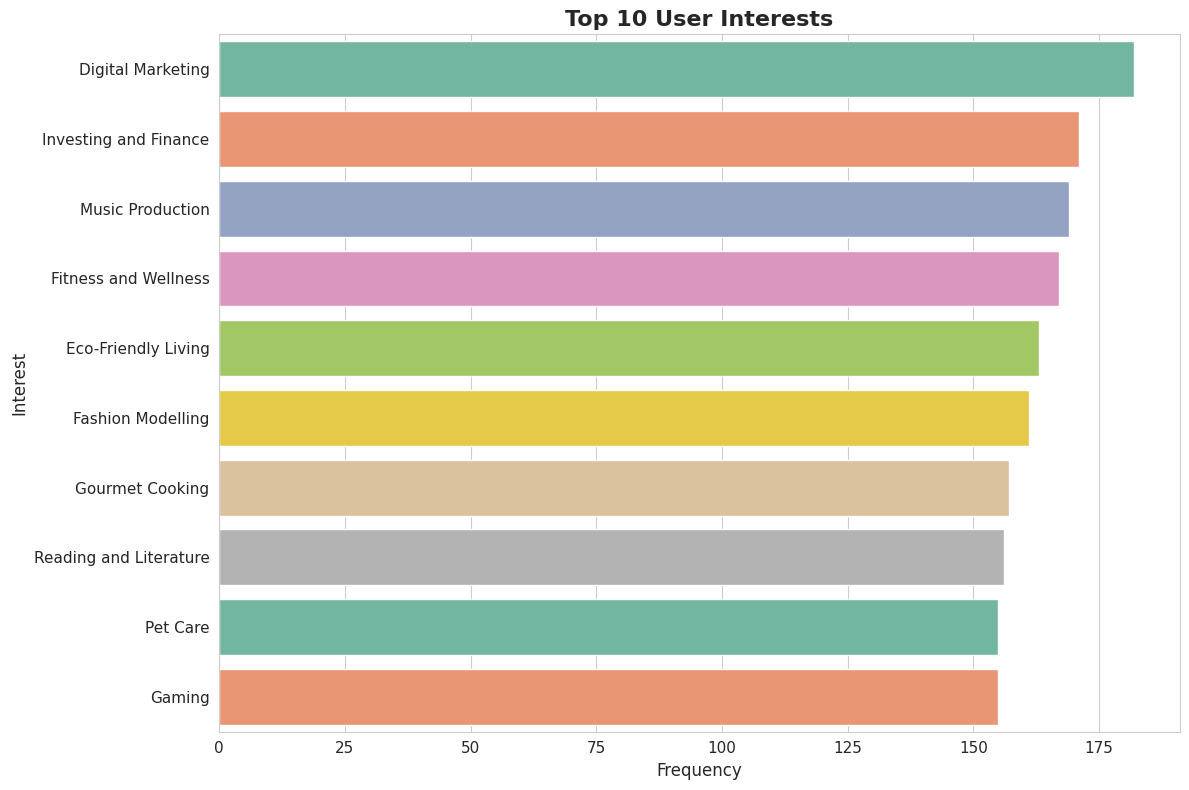

In [13]:
from collections import Counter

# Seaborn style for consistency
sns.set_style("whitegrid")
custom_palette = sns.color_palette("viridis")

# Splitting the 'Top Interests' column and creating a list of all interests
interests_list = data['Top Interests'].str.split(', ').sum()

# Counting the frequency of each interest
interests_counter = Counter(interests_list)

# Converting the counter object to a DataFrame for easier plotting
interests_df = pd.DataFrame(interests_counter.items(), columns=['Interest', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plotting the Top 10 User Interests
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Interest', data=interests_df.head(10), palette='Set2')
plt.title('Top 10 User Interests', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Interest', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
# Set the seaborn style
sns.set_style("whitegrid")

# Selecting features for clustering
features = ['Age', 'Gender', 'Income Level',
            'Time Spent Online (hrs/weekday)',
            'Time Spent Online (hrs/weekend)',
            'Likes and Reactions',
            'Click-Through Rates (CTR)']

# Separating the features we want to consider for clustering
X = data[features]

# Define preprocessing for numerical and categorical features
numeric_features = ['Time Spent Online (hrs/weekday)',
                    'Time Spent Online (hrs/weekend)',
                    'Likes and Reactions',
                    'Click-Through Rates (CTR)']
numeric_transformer = StandardScaler()

categorical_features = ['Age', 'Gender', 'Income Level']
categorical_transformer = OneHotEncoder()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('cluster', KMeans(n_clusters=5, random_state=42))
])

# Fit the pipeline to the data
pipeline.fit(X)

cluster_labels = pipeline.named_steps['cluster'].labels_
data['Cluster'] = cluster_labels

print(data.head())


   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
1                              0.5                              7.7   
2                              4.5             

In [16]:
# computing the mean values of numerical features for each cluster
cluster_means = data.groupby('Cluster')[numeric_features].mean()

for feature in categorical_features:
    mode_series = data.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

print(cluster_means)

         Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
Cluster                                                                     
0                               3.911111                         5.212963   
1                               1.559394                         6.002424   
2                               3.019737                         2.584211   
3                               3.080882                         5.774510   
4                               1.809626                         3.839572   

         Likes and Reactions  Click-Through Rates (CTR)    Age  Gender  \
Cluster                                                                  
0                2409.620370                   0.149588  25-34  Female   
1                5005.121212                   0.179836  35-44    Male   
2                6861.587719                   0.170614  25-34    Male   
3                7457.602941                   0.067971  25-34  Female   
4               

In [18]:
import numpy as np

# preparing data for radar chart
features_to_plot = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
labels = np.array(features_to_plot)

# creating a dataframe for the radar chart
radar_df = cluster_means[features_to_plot].reset_index()

# normalizing the data
radar_df_normalized = radar_df.copy()
for feature in features_to_plot:
    radar_df_normalized[feature] = (radar_df[feature] - radar_df[feature].min()) / (radar_df[feature].max() - radar_df[feature].min())

# adding a full circle for plotting using pd.concat instead of append
#radar_df_normalized = radar_df_normalized.append(radar_df_normalized.iloc[0])
radar_df_normalized = pd.concat([radar_df_normalized, radar_df_normalized.iloc[[0]]]) # Use pd.concat and iloc[[0]] to select the first row as a DataFrame

# assigning names to segments
segment_names = ['Weekend Warriors', 'Engaged Professionals', 'Low-Key Users', 'Active Explorers', 'Budget Browsers']


In [22]:
import plotly.graph_objects as go

fig = go.Figure()

# Loop through each segment to add to the radar chart
for i, segment in enumerate(segment_names):
    values = radar_df_normalized.iloc[i][features_to_plot].values.tolist()
    values += values[:1]  # Close the loop

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=labels.tolist() + [labels[0]],  # Close the loop
        fill='toself',
        name=segment,
        hoverinfo='text',
        text=[
            f"{label}: {value:.2f}"
            for label, value in zip(features_to_plot, radar_df_normalized.iloc[i][features_to_plot])
        ] + [f"{labels[0]}: {radar_df_normalized.iloc[i][features_to_plot][0]:.2f}"]
    ))

# Final layout settings
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True,
    title='Radar Chart: Cluster-wise User Behaviour',
    template='plotly_white'
)

fig.show()


The radar chart is helpful for understanding how different types of users behave, which makes it easier for marketers to plan better ad strategies. For instance, if a segment like “Weekend Warriors” is most active during weekends, then ads targeting them can be scheduled accordingly. On the other hand, “Engaged Professionals” might respond better to ads shown throughout the week. So basically, this is how user profiling and segmentation works using Python. User profiling means creating a clear picture of each user based on their habits, preferences, and online behavior. Segmentation helps in dividing users into different groups who have similar characteristics. This makes it easier to target each group in a more personalized way, whether it's for marketing, ads, or offering relevant services.